# **Kelompok 2 IBDA2032 Computer Vision**
- Yosia H. Farianto (10101190478) 
- Khenny F. Suciady (10101200235) 
- Jody N. Imanuel (10101190378) 


# **Mengimpor Dataset dari Kaggle ke Dalam Google Collabs**

Dalam proses persiapan data, langkah pertama yang dilakukan adalah import data set dari kaggle (yang berisikan orang-orang yang menggunakan masker dan tidak menggunakan masker) ke dalam Google Collabs.

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 93% 152M/163M [00:01<00:00, 107MB/s] 
100% 163M/163M [00:01<00:00, 117MB/s]


In [ ]:
! unzip face-mask-dataset.zip -d face-mask-dataset

Streaming output truncated to the last 5000 lines.
  inflating: face-mask-dataset/data/with_mask/with_mask_3297.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3298.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3299.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_33.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_330.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3300.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3301.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3302.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3303.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3304.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3305.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3306.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3307.jpg  
  inflating: face-mask-dataset/data/with_mask/with_mask_3308.jpg  
  inflating: f

## **Library yang Digunakan**

In [3]:
from imutils import paths
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os
import time

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Dense, Dropout, Conv2D
import tensorflow as tf

from keras import callbacks
import time

## **Mengambil Data dari Directory**

In [ ]:
data = "/content/face-mask-dataset/data"

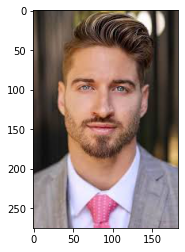

In [ ]:
Img_Paths = list(paths.list_images(data))

#Displaying sample image from dataset
sample1 = Image.open(Img_Paths[1000])
plt.imshow(sample1)


## **Processing Data**


Setelah itu, karena data tersebut masih memiliki type img, maka kami mengubahnya kedalam bentuk array bertipe float. Kemudian, langkah yang kami lakukan selanjutnya adalah memasukkan image ke dalam sebuah list bernama imgs dan label dari image tersebut ke dalam list bernama labels.

In [ ]:


#memasukkan semua data kedalam list
print("Loading images...")
Img_Paths = list(paths.list_images(data))
imgs = []
labels = []

#melakukan looping terhadap data yang ada 
for i in Img_Paths:
    #mengekstrak label data
    label = i.split(os.path.sep)[-2]
    
    # melakukan resize data menjadi (224,224), melakukan konversi image menjadi array, dan melakukan preprocessing data
    img = load_img(i, target_size = (224,224)) 
    img = img_to_array(img) 
    img = preprocess_input(img)
    
    #memasukkan data yang diproses dan menambahkannya kedalam list imgs dan labels
    imgs.append(img)
    labels.append(label)



Loading images...


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#melakukan konversi data menjadi float menggunakan numpy
imgs = np.array(imgs,dtype="float32")
labels = np.array(labels)
print("...Done")

...Done


In [ ]:
imgs.shape

(7553, 224, 224, 3)

In [ ]:
labels.shape

(7553,)

## **Menampilkan 20 Data Awal Berdasarkan Label Masing-masing**

Kami juga melakukan visualisasi data awal yang terkandung didalam dataset yang telah di proses. Maka hasil yang didapatkan adalah sebagai berikut.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

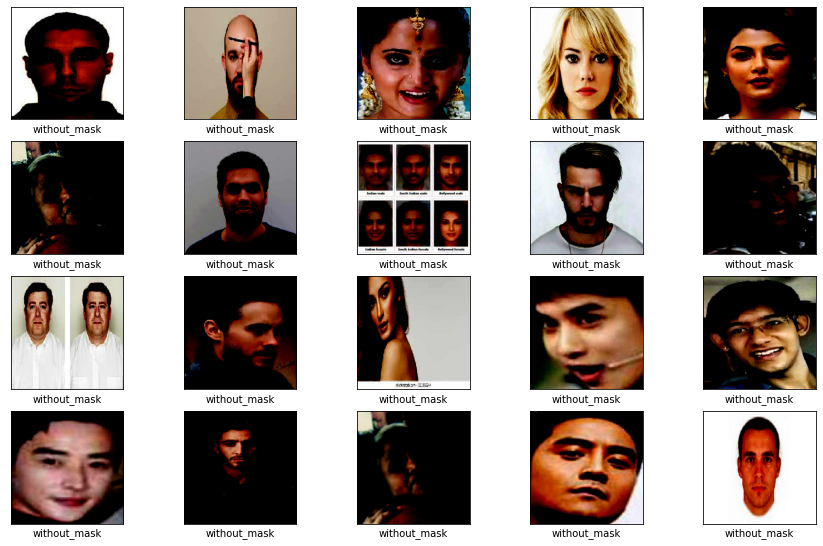

In [ ]:
plt.figure(figsize=(15,12))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = imgs[i]
    plt.imshow(img)
    plt.xlabel(labels[i])
    
plt.show()

## **Membagi Data Menjadi Data Uji dan Data Latih**

Selanjutnya, dikarenakan labels data masih bersifat string, kami mengubahnya kedalam bentuk biner (ket: 0 untuk with mask, 1 untuk without mask) dan setelah mengubah data, kami membagi keseluruhan data menjadi data latih dan uji dengan test_size sebesar 0,2. Kami menggunakan library ImageDatagenerator agar dapat  berguna untuk meningkatkan performa dan kemampuan model sehingga dapat memudahkan dalam menggeneralisasi data. 

In [ ]:

# mengubah label yang menjadi data binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(X_train , X_test , y_train , y_test) = train_test_split(imgs,labels,test_size=0.20,stratify=labels,random_state=42)

# memperluas set data latih yang berguna meningkatkan performa dan kemampuan model untuk menggeneralisasi.
img_gen = ImageDataGenerator(rotation_range=40,
                            zoom_range=0.20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest")

print("Train size: ",len(X_train),"Test size: ",len(X_test))

Train size:  6042 Test size:  1511


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


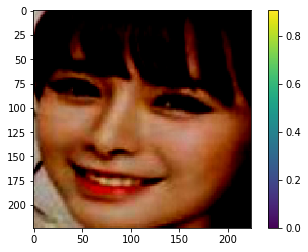

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#  ukuran dari sta latih dan data uji
def train_test_shape():
    print('X_train_shape :', X_train.shape)
    print('y_train_shape :', y_train.shape)
    print('X_test_shape :', X_test.shape)
    print('y_test_shape :', y_test.shape)
    
train_test_shape()

X_train_shape : (6042, 224, 224, 3)
y_train_shape : (6042, 2)
X_test_shape : (1511, 224, 224, 3)
y_test_shape : (1511, 2)


## **Mempersiapkan Model**

Berikut ini adalah model yang telah kami rancang untuk masuk ke dalam pelatihan.

In [ ]:


model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=X_train.shape[1:],activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 111, 111, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 64)        57664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2163250   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Selanjutnya disini kami juga menggunakan model checkpoint agar model hanya menyimpan nilai akurasi paling tinggi. Hal ini kami lakukan dikarenakan pada percobaan pertama, hasil akurasi selalu naik turun (tidak konsisten naik)

In [ ]:
# add checkpoint and earlystopping

mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## **Melatih Model**

Untuk melihat berapa lama model kami selesai dalam proses pelatihan, kami menggunakan library time untuk mengukurnya. Dan hasilnya, model kami memiliki tingkat akurasi sebesasr 97% dan waktu yang digunakan adalah 47 menit.

In [ ]:

start = time.time()

history = model.fit(img_gen.flow(X_train,y_train,batch_size=100),
                    validation_data=(X_test,y_test),
                    epochs=50,
                    verbose=1,
                    callbacks = [mc]
                    
                    )
end = time.time()
print("Total train time: ",(end-start)/60," mins")

Epoch 1/50
61/61 [==============================] - 99s 903ms/step - loss: 0.9961 - accuracy: 0.6396 - val_loss: 0.3468 - val_accuracy: 0.8570

Epoch 00001: val_accuracy improved from -inf to 0.85705, saving model to best_model.h5
Epoch 2/50
61/61 [==============================] - 54s 879ms/step - loss: 0.4169 - accuracy: 0.8174 - val_loss: 0.3047 - val_accuracy: 0.8822

Epoch 00002: val_accuracy improved from 0.85705 to 0.88220, saving model to best_model.h5
Epoch 3/50
61/61 [==============================] - 54s 881ms/step - loss: 0.4065 - accuracy: 0.8155 - val_loss: 0.2970 - val_accuracy: 0.8802

Epoch 00003: val_accuracy did not improve from 0.88220
Epoch 4/50
61/61 [==============================] - 54s 884ms/step - loss: 0.3785 - accuracy: 0.8391 - val_loss: 0.2841 - val_accuracy: 0.8756

Epoch 00004: val_accuracy did not improve from 0.88220
Epoch 5/50
61/61 [==============================] - 55s 897ms/step - loss: 0.3682 - accuracy: 0.8375 - val_loss: 0.2374 - val_accuracy: 0

### **Selanjutnya, disini kami akan menyimpan model yang telah kami latih kedalam file h5 dan melakukan prediksi terhadap data yang kami ambil dari kaggle.**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load the saved model
from keras import models
saved_model = models.load_model('/content/drive/MyDrive/Colab Notebooks/best_model.h5')

In [ ]:
predictions = saved_model.predict(X_test)
Y_true = np.argmax(y_test, axis=1)
Y_pred_classes = np.argmax(predictions, axis = 1)

## **Mendeklarasikan Fungsi untuk Melakukan Visualisasi Gambar yang Akan Membantu kita di Dalam Memahami dari Nilai Prediksi**

In [13]:

class_names = ['with_mask', 'without_mask']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim(['without_mask', 'with_mask'])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Berikut ini adalah hasil visualisasi prediksi model kami terhadap 15 foto dari data kaggle. Dan dapat kita lihat bahwa model kita belum berhasil menebak 1 foto diantara 15 foto yang dipilih.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

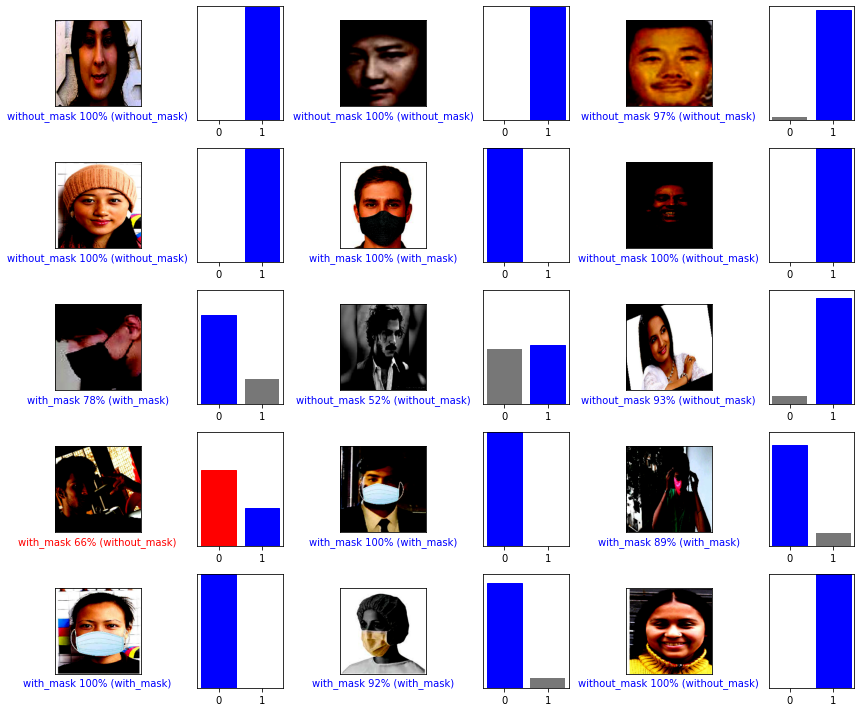

In [ ]:
# Lakukan visualisasi untuk 15 gambar lainnya

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_true, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_true)
plt.tight_layout()
plt.show()

Menurut hasil analisis kami, foto yang salah diprediksi memliki warna yang terlalu gelap sehingga model kami sulit untuk mengidentifikasi apakah orang tersebut menggunakan masker atau tidak.

 #### **Melihat Kualitas Model yang Sudah Dibuat Secara Keseluruhan dengan Menggunakan Visualisasi Nilai Loss dan Akurasi**

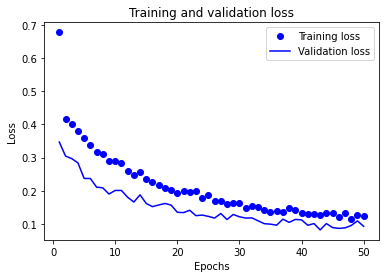

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

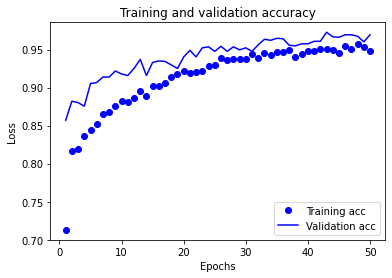

In [ ]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Dari hasil visualisasi diatas, kita dapat melihat bahwa adanya perbedaan yang signifikan antara data latih dan data uji. Dari kedua visualisasi diatas, tidak ada nilai antara data latih dan uji yang selaras naik maupun turun secara berdampingan. tetapi bisa dilihat bahwa loss mengalami penurunan yang jelas , begitu juga akurasi kita memliki kenaikan yang bagus, tidak menetap disuatu epoch terlalu lama dengan nilai yang sama.

## **Hasil Plot Confusion Matrik**

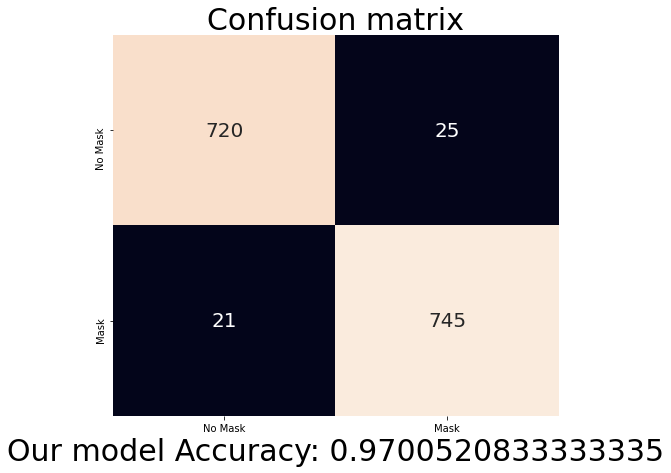

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

labels=["No Mask","Mask"]
plt.subplots(figsize=(8,7))
cm = confusion_matrix(Y_true,Y_pred_classes)
sns.heatmap(cm ,xticklabels=labels, yticklabels=labels, annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
plt.title("Confusion matrix",fontsize=30)
plt.xlabel(f"Our model Accuracy: {f1_score(Y_true,Y_pred_classes)}",fontsize=30)
plt.show()

## **Parameter-parameter yang ada pada Confusion Matriks Data Kaggle**

In [ ]:
def cm_parameter():
  print('Specificity (TN/(TN+FP)) :', cm[1][1]/sum(cm[1])*100, '%' )
  x = cm[1][1] + cm[0][1]
  print('Negative Predictive Value (TN/TN+FN) :',(cm[1][1]/x)*100, '%')
  print('Sensitivity (TP/TP+FN) :', cm[0][0]/sum(cm[0])* 100, '%' )
  a = cm[0][0] + cm[1][0]
  print('Precision (TP/TP+FP) :',(cm[0][0]/a)*100, '%')

cm_parameter()

Specificity (TN/(TN+FP)) : 97.25848563968668 %
Negative Predictive Value (TN/TN+FN) : 96.75324675324676 %
Sensitivity (TP/TP+FN) : 96.64429530201343 %
# precision (TP/TP+FP) : 97.16599190283401 %


Dari hasil analisa dan kalkulasi yang kami sesuai visualisasi dan data diatas, dapat terlihat bahwa parameter yang dirasa paling penting dalam studi kasus deteksi masker adalah Specificity, walaupun secara keseluruhan persentase dari tiap parameter tidak jauh berbeda. Specificity memliki persentase 97,258 %, lebih tinggi dibanding yang lain.


### **Akurasi Data Test dan Train**

In [ ]:

# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.976, Test: 0.973


## **Persiapan Untuk Melakukan Uji Model Terhadap Data Anggota Kelas**

Mengambil data-data anggota kelas dari drive pribadi untuk melakukan prediksi

In [1]:
my_data = '/content/drive/MyDrive/Colab Notebooks/data_kelas'

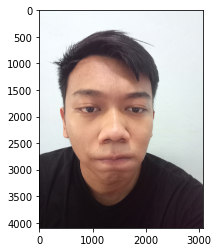

In [8]:
Img_Paths = list(paths.list_images(my_data))

#Displaying sample image from dataset
sample2 = Image.open(Img_Paths[20])
plt.imshow(sample2)


## **Memproses Data Seperti yang Telah Dilakukan Sebelumnya**

---



Melakukan hal yang sama seperti pemrosesan data yang sebelumnya yaitu mengubah data dengan tipe img ke bentuk array

In [9]:
my_image_paths = list(paths.list_images(my_data))
my_imgs = []
targets = []

for i in my_image_paths:
    target = i.split(os.path.sep)[-2]

    image = load_img(i,target_size=(224,224)) 
    image = img_to_array(image) 
    image = preprocess_input(image)

    my_imgs.append(image)
    targets.append(target)

my_imgs = np.array(my_imgs,dtype="float32")
targets = np.array(targets)
print('Done...')

Done...


## **Mengubah Label dari Data menjadi Binary** 

In [10]:
lb = LabelBinarizer()
targets = lb.fit_transform(targets)
targets = to_categorical(targets)

## **Membuat Prediksi Terhadap Data dari Model yang Sudah Disimpan**

In [20]:
pred = saved_model.predict(my_imgs)
y_true = np.argmax(targets, axis=1)
y_pred = np.argmax(pred, axis=1)

## **Hasil Prediksi**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

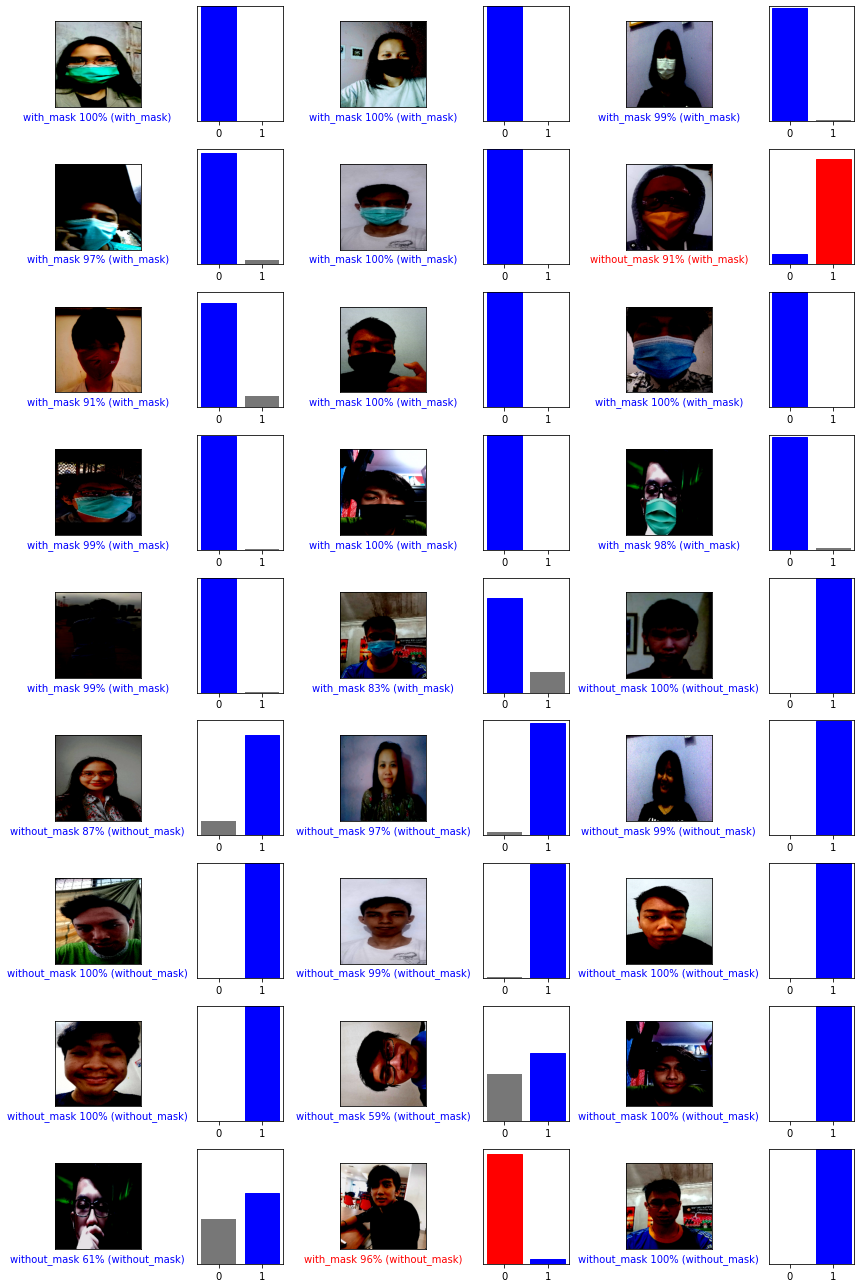

In [28]:
# Lakukan visualisasi untuk 15 gambar lainnya

num_rows = 9
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], y_true, my_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], y_true)
plt.tight_layout()
plt.show()

Dari hasil prediksi diatas, dapat terlihat bahwa seluruh pesarta kecerdasan buatan berhasil dan sesuai dengan kenyataannya. foto pertama yang gagal merupakan suatu tantangan dari anggota prodi lain dengan mengambil foto dan memakai 2 masker (hampir semua muka tertupi). Dan hasilnya, model kami belum bisa memprediksi dengan benar. Foto kedua yaitu untuk foto Edgar Tigor. Menurut analisa kami, model kami salah memprediksi karena baju yang dipakai edgar berwarna hitam dan tinggi bajunya mencapai leher. Jadi, menurut kami model yang kami gunakan melihat baju yang dipakai adalah masker hitam.  

## **Confusion Matriks Model yang Dipakai Terhadap Data Anggota Kelas**

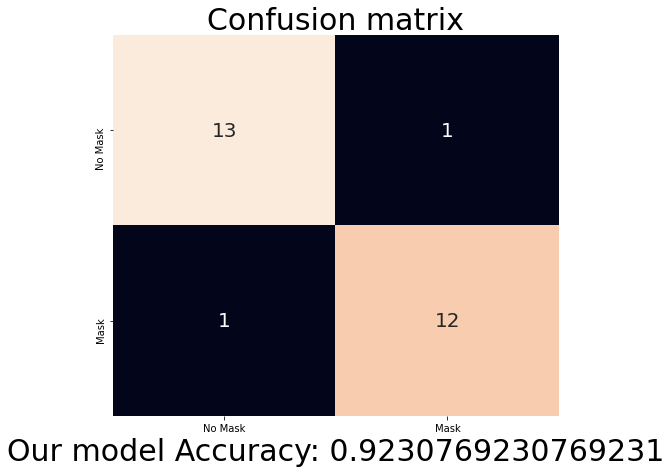

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

targets=["No Mask","Mask"]
plt.subplots(figsize=(8,7))
cm1 = confusion_matrix(y_true,y_pred)
sns.heatmap(cm1 ,xticklabels=targets, yticklabels=targets, annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
plt.title("Confusion matrix",fontsize=30)
plt.xlabel(f"Our model Accuracy: {f1_score(y_true,y_pred)}",fontsize=30)
plt.show()

## **Parameter-parameter yang ada pada Confusion Matriks Data Anggota Kelas**

In [25]:
def cm1_parameter():
  print('Specificity (TN/(TN+FP)) :', cm1[1][1]/sum(cm1[1])*100, '%' )
  x = cm1[1][1] + cm1[0][1]
  print('Negative Predictive Value (TN/TN+FN) :',(cm1[1][1]/x)*100, '%')
  print('Sensitivity (TP/TP+FN) :', cm1[0][0]/sum(cm1[0])* 100, '%' )
  a = cm1[0][0] + cm1[1][0]
  print('Precision (TP/TP+FP) :',(cm1[0][0]/a)*100, '%')

cm1_parameter()

Specificity (TN/(TN+FP)) : 92.3076923076923 %
Negative Predictive Value (TN/TN+FN) : 92.3076923076923 %
Sensitivity (TP/TP+FN) : 92.85714285714286 %
Precision (TP/TP+FP) : 92.85714285714286 %


# **Kesimpulan**

- Pada model ini, kami menggunakan epoch sebanyak 50, dan pelatihan model selesai dalam waktu 47 menit. Penentuan berapa lama waktu disini menggunakan library time yang langsung berjalan ketika pelatihan model di running.

- Dari hasil analisa dan kalkulasi yang kami lakukan, dapat terlihat bahwa parameter yang dirasa paling penting dalam studi kasus deteksi masker:
 -  Untuk data kaggle adalah Specificity (97,2 %)
 -  Untuk data anggota kelas adalah Precision (92,8 %)

- Jumlah epoch yang optimal menurut kami adalah 50 Epoch. Dengan akurasi sebesar 97%, model yang digunakan sudah cukup baik dalam mendeteksi apakah seseorang sedang menggunakan masker ataupun tidak. 

- Cara yang kami lakukan dalam menigkatkan akurasi:   
  
  - Dengan model yang sama dan compile model optimizer Adam tanpa memasukkan learning rate dan decay, kami hanya mendapatkan akurasi pada kisaran 90 - 93 %. Dan untuk mendapatkan akurasi sebesar 97%, dalam compile model kami menggunakan optimizer Adam dengan learning rate sebesar 10^-3 dan decay 10^-5.
  - Menentukan epoch yang paling baik.
  - Menggunakan DataImageGenerator dalam pelatihan model.

- Hasil confusion matriks antara data kaggle dan juga data dari anggota kelas memiliki akurasi yang sedikit berbeda. 
 - Akurasi data kaggle merujuk pada angka 97%
 - Akurasi data anggota kelas merujuk pada angka 92%
 - Namun bisa dilihat bahwa keduanya memiliki akurasi diatas 90% dan perbedaan antara keduanya juga tidak terlalu jauh. Sehinggam menurut kami hasilnya cukup baik untuk melakukan klasifikasi.

